In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [4]:
# Read the dataset
df = pd.read_csv('HousingPrices.csv')

# Show first 5 records
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [6]:
# Read the dataset
df = pd.read_csv('HousingPrices.csv')

# Show first 5 records
df

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [8]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


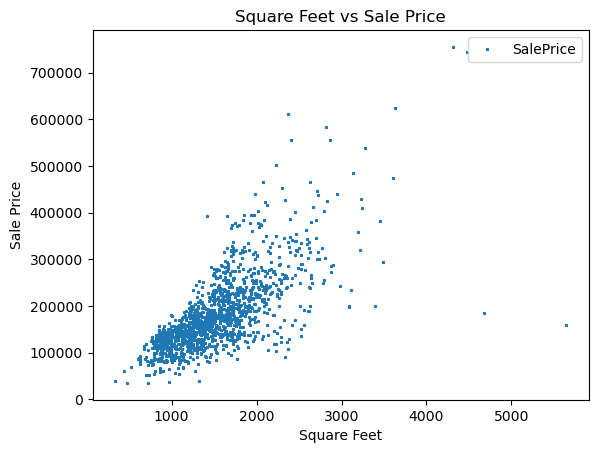

In [12]:
df.plot(x='SquareFeet', y='SalePrice', style='*', markersize=2)
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [18]:
X = df.iloc[:, :-1].values
print(X)

[[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]]


In [20]:
y = df.iloc[:, 1].values 
print(y)

[208500 181500 223500 ... 266500 142125 147500]


In [22]:
# Split the dataset into X and y columns
X = df.iloc[:, :-1].values            # Independent variables
y = df.iloc[:, 1].values              # Dependent variable

In [24]:
print(X,y)

[[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]] [208500 181500 223500 ... 266500 142125 147500]


In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [28]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1460, 1), (1460,), (1168, 1), (292, 1), (1168,), (292,))

In [30]:
# Train the model
lr_model = LinearRegression().fit(X_train, y_train)

# Calculate the predicted values
y_pred_lr = lr_model.predict(X_test)

In [32]:
print(lr_model.intercept_)
print(lr_model.coef_)

21067.331972325483
[104.69660897]


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared Score (R²): {r2_lr:.2f}")

Mean Squared Error (MSE): 2514165695.09
R-squared Score (R²): 0.59


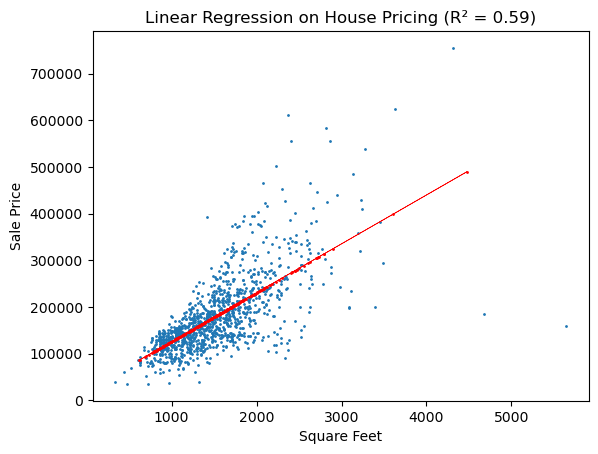

In [36]:
# Show the plotted values
plt.scatter(X_train, y_train, s = 1)
plt.plot(X_test, y_pred_lr, color = 'red', marker = 'o', linewidth = 0.5, markersize = 1)
plt.title(f"Linear Regression on House Pricing (R² = {r2_lr:.2f})")
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

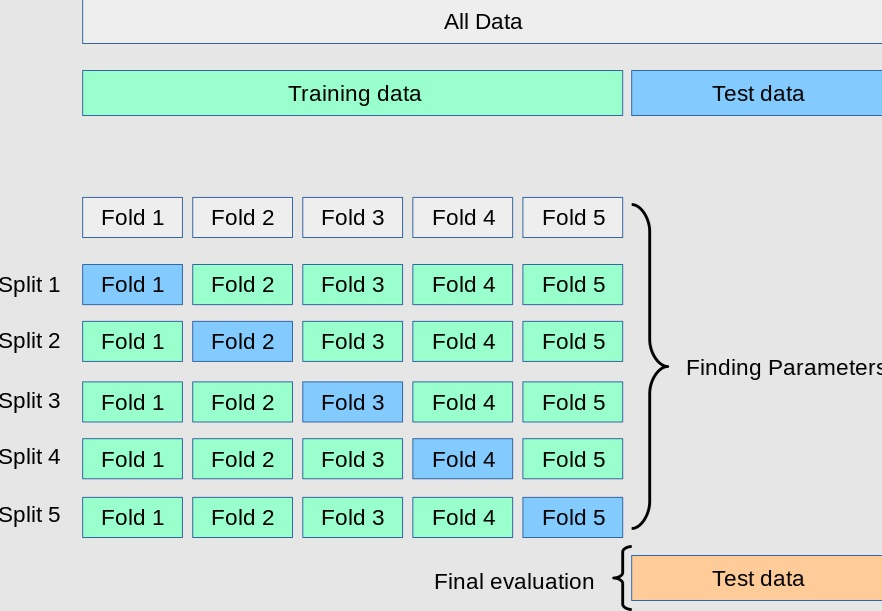

In [38]:
from IPython.display import Image
Image(filename =r'Image.jpg', width = 500, height = 250)

In [46]:
# Perform 10-fold cross-validation and compute mean score
cv_scores = cross_val_score(lr_model, X, y, cv = 10, scoring = 'r2')  # R^2 score

# Calculate the averga escore
mean_cv_score = np.mean(cv_scores)

print(f"\nMean Cross-Validation Score (R²) with (cv = 10): {mean_cv_score:.4f}")


Mean Cross-Validation Score (R²) with (cv = 10): 0.4997


In [ ]:
R²         cv

0.4997     10
0.4939     5
0.4807     20